In [43]:
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [44]:
df_GM = df[df['job_country'] == 'Germany']

In [45]:
df_skills = df_GM.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",python
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",sql
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",c#
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",azure
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",airflow
...,...,...
785735,Senior Data Engineer,docker
785737,CRM Data Analyst,sas
785737,CRM Data Analyst,sas
785737,CRM Data Analyst,sql


In [46]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
907,python,Data Scientist,4157
906,python,Data Engineer,3524
1139,sql,Data Engineer,3145
1138,sql,Data Analyst,2947
905,python,Data Analyst,2309
...,...,...,...
1369,yarn,Data Analyst,1
1371,yarn,Data Scientist,1
1375,zoom,Data Engineer,1
792,outlook,Cloud Engineer,1


In [47]:
#job_title = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])#sorted just to sorted with alpha
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

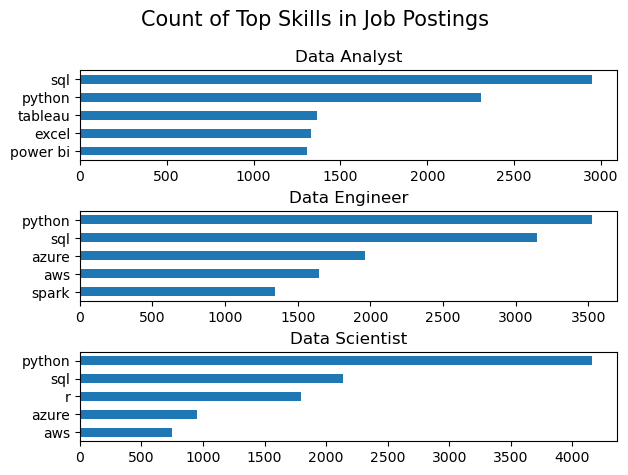

In [48]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)#fix the overlap
plt.show()


In [49]:
df_job_title_count = df_GM['job_title_short'].value_counts().reset_index(name='jobs_total')

In [50]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,4157,6745,61.630838
1,python,Data Engineer,3524,6675,52.794007
2,sql,Data Engineer,3145,6675,47.116105
3,sql,Data Analyst,2947,7131,41.326602
4,python,Data Analyst,2309,7131,32.379750
...,...,...,...,...,...
1377,yarn,Data Analyst,1,7131,0.014023
1378,yarn,Data Scientist,1,6745,0.014826
1379,zoom,Data Engineer,1,6675,0.014981
1380,outlook,Cloud Engineer,1,189,0.529101


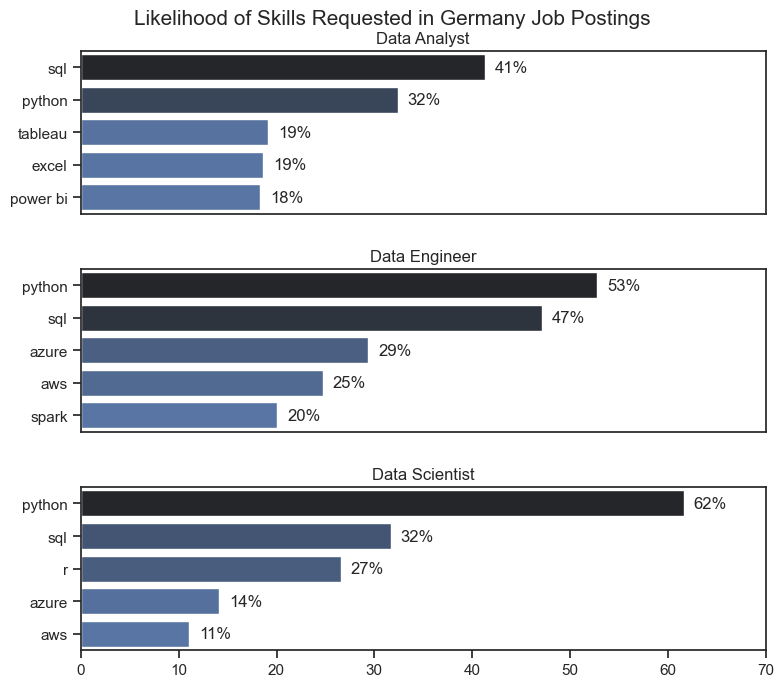

In [72]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 7))  # Larger figure
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    # Filter top 5 skills for each job
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    ax[i].set_title(job_title)
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles)- 1:
        ax[i].set_xticks([])    
    
    # Plot horizontal bar chart
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title, legend=False)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')

    
    # Remove y-axis label (optional)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 70)

# Add a main title
fig.suptitle('Likelihood of Skills Requested in Germany Job Postings', fontsize=15)

# Improve layout spacing
fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=0.92)  # Leave space for title

plt.show()
